In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Menggabungkan data sales 12 bulan, menjadi 1 csv file

In [2]:
files =[file for file in os.listdir("C:/Users/Yohanes/sales_analysis/Sales_Data")]
for file in files:
    print(file)

all_data.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
path = "C:/Users/Yohanes/sales_analysis/Sales_Data"

#blank dataframe
all_data = pd.DataFrame()

for file in files:
    current_df = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_df])
    
all_data.shape

C:\Users\Yohanes\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,2,3,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(372537, 8)

### Dijadikan dataset yang akan dianalisa

In [4]:
all_data.to_csv('C:/Users/Yohanes/sales_analysis/Sales_Data/all_data.csv',index=False)

### Data cleaning dan formating

In [5]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
concat_col          object
Month               object
dtype: object

In [6]:
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1   176559  Bose SoundSport Headphones                1      99.99   
2   176560                Google Phone                1        600   
3   176560            Wired Headphones                1      11.99   
4   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001   
1  04/07/19 22:30     682 Chestnut St, Boston, MA 02215   
2  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001   
4  04/30/19 09:27     333 8th St, Los Angeles, CA 90001   

                                          concat_col Month  
0  176558 USB-C Charging Cable 2 11.95 04/19/19 0...    04  
1  176559 Bose SoundSport Headphones 1 99.99 04/0...    04  
2  176560 Google Phone 1 600 04/12/19 14:38 669 S...    04  
3  176560 Wired Headphones 1 11.99 04/12/19 14:38...    04  
4  176561 Wired Headphones 1 11.99 04/30/19 09:27...    04

In [7]:
all_data.isnull().sum()

Order ID               545
Product                545
Quantity Ordered       545
Price Each             545
Order Date             545
Purchase Address       545
concat_col          186850
Month               186850
dtype: int64

In [8]:
all_data = all_data.dropna(how='all')
all_data.shape

(371992, 8)

### Mencari bulan penjualan tertinggi

In [9]:
'04/19/19 08:46'.split('/')[0]

'04'

In [10]:
all_data = all_data.dropna()

In [11]:
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1   176559  Bose SoundSport Headphones                1      99.99   
2   176560                Google Phone                1        600   
3   176560            Wired Headphones                1      11.99   
4   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001   
1  04/07/19 22:30     682 Chestnut St, Boston, MA 02215   
2  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001   
4  04/30/19 09:27     333 8th St, Los Angeles, CA 90001   

                                          concat_col Month  
0  176558 USB-C Charging Cable 2 11.95 04/19/19 0...    04  
1  176559 Bose SoundSport Headphones 1 99.99 04/0...    04  
2  176560 Google Phone 1 600 04/12/19 14:38 669 S...    04  
3  176560 Wired Headphones 1 11.99 04/12/19 14:38...    04  
4  176561 Wired Headphones 1 11.99 04/30/19 09:27...    04

In [12]:
def month(x):
    return x.split('/')[0]

### Menambahkan kolom "Month"

In [27]:
all_data['Month']=all_data['Order Date'].apply(month)

In [13]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
concat_col          object
Month               object
dtype: object

In [14]:
all_data.shape

(185687, 8)

In [15]:
all_data['Month']=all_data['Month'].astype(int)

ValueError: invalid literal for int() with base 10: 'Order Date'

In [16]:
all_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', 2, 3,
       1, 7, 8, 6, 4, 5, 11, 12, 10, 9], dtype=object)

In [17]:
filter=all_data['Month']=='Order Date'
len(all_data[~filter])

185686

In [18]:
all_data=all_data[~filter]

In [19]:
all_data.shape

(185686, 8)

In [20]:
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1   176559  Bose SoundSport Headphones                1      99.99   
2   176560                Google Phone                1        600   
3   176560            Wired Headphones                1      11.99   
4   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001   
1  04/07/19 22:30     682 Chestnut St, Boston, MA 02215   
2  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001   
4  04/30/19 09:27     333 8th St, Los Angeles, CA 90001   

                                          concat_col Month  
0  176558 USB-C Charging Cable 2 11.95 04/19/19 0...    04  
1  176559 Bose SoundSport Headphones 1 99.99 04/0...    04  
2  176560 Google Phone 1 600 04/12/19 14:38 669 S...    04  
3  176560 Wired Headphones 1 11.99 04/12/19 14:38...    04  
4  176561 Wired Headphones 1 11.99 04/30/19 09:27...    04

In [21]:
all_data['Month']=all_data['Month'].astype(int)

In [22]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
concat_col          object
Month                int32
dtype: object

In [23]:
all_data['Price Each']=all_data['Price Each'].astype(float)

In [24]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)

In [25]:
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head(5)

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
1   176559  Bose SoundSport Headphones                 1       99.99   
2   176560                Google Phone                 1      600.00   
3   176560            Wired Headphones                 1       11.99   
4   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001   
1  04/07/19 22:30     682 Chestnut St, Boston, MA 02215   
2  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001   
4  04/30/19 09:27     333 8th St, Los Angeles, CA 90001   

                                          concat_col  Month   sales  
0  176558 USB-C Charging Cable 2 11.95 04/19/19 0...      4   23.90  
1  176559 Bose SoundSport Headphones 1 99.99 04/0...      4   99.99  
2  176560 Google Phone 1 600 04/12/19 14:38 669 S...      4  600.00  
3  176560 Wired Headphones 1 11.99 04/12/19 14:38...      4   11.99  
4  176561 Wired Headphones 1 11.99 04/30/19 09:27...      4   11.99

In [26]:
all_data.groupby('Month')['sales'].sum()

Month
1     1.821413e+06
2     2.200078e+06
3     2.804973e+06
4     3.389218e+06
5     3.150616e+06
6     2.576280e+06
7     2.646461e+06
8     2.241083e+06
9     2.094466e+06
10    3.734778e+06
11    3.197875e+06
12    4.608296e+06
Name: sales, dtype: float64

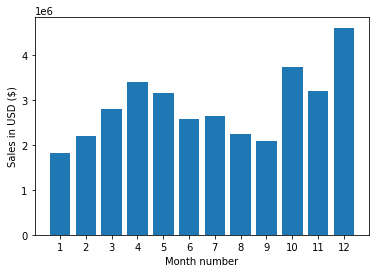

In [27]:
months=range(1,13)
plt.bar(months,all_data.groupby('Month')['sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

### Mencari Kota dengan penjualan terbanyak

In [28]:
'917 1st St, Dallas, TX 75001'.split(',')[1]

' Dallas'

In [29]:
def city(x):
    return x.split(',')[1]

In [30]:
all_data['city']=all_data['Purchase Address'].apply(city)

In [31]:
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
1   176559  Bose SoundSport Headphones                 1       99.99   
2   176560                Google Phone                 1      600.00   
3   176560            Wired Headphones                 1       11.99   
4   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001   
1  04/07/19 22:30     682 Chestnut St, Boston, MA 02215   
2  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001   
4  04/30/19 09:27     333 8th St, Los Angeles, CA 90001   

                                          concat_col  Month   sales  \
0  176558 USB-C Charging Cable 2 11.95 04/19/19 0...      4   23.90   
1  176559 Bose SoundSport Headphones 1 99.99 04/0...      4   99.99   
2  176560 Google Phone 1 600 04/12/19 14:38 669 S...      4  600.00   
3  176560 Wired Headphones 1 11.99 04/12/19 14:38...      4   11.99   
4  176561 Wired Headphones 1 11.99 04/30/19 09:27...      4   11.99   

           city  
0        Dallas  
1        Boston  
2   Los Angeles  
3   Los Angeles  
4   Los Angeles

In [32]:
all_data.groupby('city')['city'].count()

city
 Atlanta          14863
 Austin            9890
 Boston           19901
 Dallas           14797
 Los Angeles      29564
 New York City    24847
 Portland         12449
 San Francisco    44662
 Seattle          14713
Name: city, dtype: int64

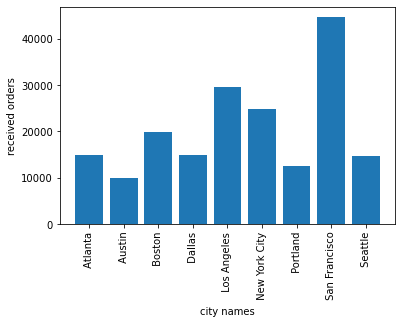

In [33]:
plt.bar(all_data.groupby('city')['city'].count().index,all_data.groupby('city')['city'].count())
plt.xticks(rotation='vertical')
plt.ylabel('received orders')
plt.xlabel('city names')
plt.show()

### Waktu (jam) terbaik untuk memunculkan iklan agar bisa menaikkan sales

In [34]:
all_data['Order Date'].dtype

dtype('O')

In [35]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour

In [36]:
keys=[]
hour=[]
for key,hour_df in all_data.groupby('Hour'):
    keys.append(key)
    hour.append(len(hour_df))

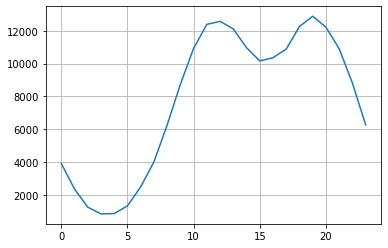

In [37]:
plt.grid()
plt.plot(keys,hour)

#### antara jam 12 siang dan jam 7 malam adalah waktu terbaik untuk memunculkan iklan agar sales meningkat

#### Mencari Produk yang paling banyak terjual

<AxesSubplot:xlabel='Product'>

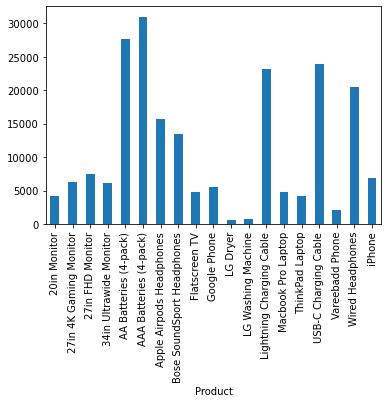

In [38]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [39]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [40]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

<ipython-input-41-2f7dc3427216>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 2880x1728 with 0 Axes>

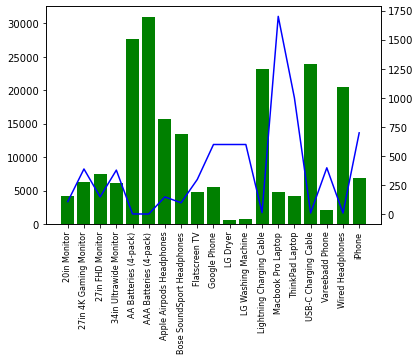

In [41]:
plt.figure(figsize=(40,24))
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)

#### Produk yang paling banyak terjual adalah "AAA Batteries (4-pack)". Produk yang paling laku mempunyai hubungan harga produk tersebut. Produk yang paling murah memiliki tingkat penjualan yang tinggi, dan sebaliknya produk yang paling murah memiliki tingkat penjualan yang rendah

In [42]:
all_data.shape

(185686, 11)

### Produk yang paling sering terjual bersamaan

#### note: Data yang dianalisa adalah order_id yang memiliki lebih dari 1 barang didalamnya

In [43]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(20)

Order ID                     Product  Quantity Ordered  Price Each  \
2     176560                Google Phone                 1      600.00   
3     176560            Wired Headphones                 1       11.99   
17    176574                Google Phone                 1      600.00   
18    176574        USB-C Charging Cable                 1       11.95   
30    176586      AAA Batteries (4-pack)                 2        2.99   
31    176586                Google Phone                 1      600.00   
117   176672    Lightning Charging Cable                 1       14.95   
118   176672        USB-C Charging Cable                 1       11.95   
127   176681    Apple Airpods Headphones                 1      150.00   
128   176681             ThinkPad Laptop                 1      999.99   
136   176689  Bose SoundSport Headphones                 1       99.99   
137   176689      AAA Batteries (4-pack)                 2        2.99   
187   176739      34in Ultrawide Monitor                 1      379.99   
188   176739                Google Phone                 1      600.00   
223   176774    Lightning Charging Cable                 1       14.95   
224   176774        USB-C Charging Cable                 1       11.95   
231   176781                      iPhone                 1      700.00   
232   176781    Lightning Charging Cable                 1       14.95   
248   176797                Google Phone                 1      600.00   
249   176797  Bose SoundSport Headphones                 1       99.99   

         Order Date                         Purchase Address  \
2    04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001   
3    04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001   
17   04/03/19 19:42        20 Hill St, Los Angeles, CA 90001   
18   04/03/19 19:42        20 Hill St, Los Angeles, CA 90001   
30   04/10/19 17:00   365 Center St, San Francisco, CA 94016   
31   04/10/19 17:00   365 Center St, San Francisco, CA 94016   
117  04/12/19 11:07    778 Maple St, New York City, NY 10001   
118  04/12/19 11:07    778 Maple St, New York City, NY 10001   
127  04/20/19 10:39         331 Cherry St, Seattle, WA 98101   
128  04/20/19 10:39         331 Cherry St, Seattle, WA 98101   
136  04/24/19 17:15  659 Lincoln St, New York City, NY 10001   
137  04/24/19 17:15  659 Lincoln St, New York City, NY 10001   
187  04/05/19 17:38             730 6th St, Austin, TX 73301   
188  04/05/19 17:38             730 6th St, Austin, TX 73301   
223  04/25/19 15:06     372 Church St, Los Angeles, CA 90001   
224  04/25/19 15:06     372 Church St, Los Angeles, CA 90001   
231  04/03/19 07:37         976 Hickory St, Dallas, TX 75001   
232  04/03/19 07:37         976 Hickory St, Dallas, TX 75001   
248  04/21/19 08:54        923 Elm St, Los Angeles, CA 90001   
249  04/21/19 08:54        923 Elm St, Los Angeles, CA 90001   

                                            concat_col  Month   sales  \
2    176560 Google Phone 1 600 04/12/19 14:38 669 S...      4  600.00   
3    176560 Wired Headphones 1 11.99 04/12/19 14:38...      4   11.99   
17   176574 Google Phone 1 600 04/03/19 19:42 20 Hi...      4  600.00   
18   176574 USB-C Charging Cable 1 11.95 04/03/19 1...      4   11.95   
30   176586 AAA Batteries (4-pack) 2 2.99 04/10/19 ...      4    5.98   
31   176586 Google Phone 1 600 04/10/19 17:00 365 C...      4  600.00   
117  176672 Lightning Charging Cable 1 14.95 04/12/...      4   14.95   
118  176672 USB-C Charging Cable 1 11.95 04/12/19 1...      4   11.95   
127  176681 Apple Airpods Headphones 1 150 04/20/19...      4  150.00   
128  176681 ThinkPad Laptop 1 999.99 04/20/19 10:39...      4  999.99   
136  176689 Bose SoundSport Headphones 1 99.99 04/2...      4   99.99   
137  176689 AAA Batteries (4-pack) 2 2.99 04/24/19 ...      4    5.98   
187  176739 34in Ultrawide Monitor 1 379.99 04/05/1...      4  379.99   
188  176739 Google Phone 1 600 04/05/19 17:38 730 6...      4  600.00   
223  1767

In [44]:
#create grouped col 
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-44-aeb0538e83e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [45]:
df.head()

Order ID                 Product  Quantity Ordered  Price Each  \
2    176560            Google Phone                 1      600.00   
3    176560        Wired Headphones                 1       11.99   
17   176574            Google Phone                 1      600.00   
18   176574    USB-C Charging Cable                 1       11.95   
30   176586  AAA Batteries (4-pack)                 2        2.99   

        Order Date                        Purchase Address  \
2   04/12/19 14:38    669 Spruce St, Los Angeles, CA 90001   
3   04/12/19 14:38    669 Spruce St, Los Angeles, CA 90001   
17  04/03/19 19:42       20 Hill St, Los Angeles, CA 90001   
18  04/03/19 19:42       20 Hill St, Los Angeles, CA 90001   
30  04/10/19 17:00  365 Center St, San Francisco, CA 94016   

                                           concat_col  Month   sales  \
2   176560 Google Phone 1 600 04/12/19 14:38 669 S...      4  600.00   
3   176560 Wired Headphones 1 11.99 04/12/19 14:38...      4   11.99   
17  176574 Google Phone 1 600 04/03/19 19:42 20 Hi...      4  600.00   
18  176574 USB-C Charging Cable 1 11.95 04/03/19 1...      4   11.95   
30  176586 AAA Batteries (4-pack) 2 2.99 04/10/19 ...      4    5.98   

              city  Hour                              Grouped  
2      Los Angeles    14        Google Phone,Wired Headphones  
3      Los Angeles    14        Google Phone,Wired Headphones  
17     Los Angeles    19    Google Phone,USB-C Charging Cable  
18     Los Angeles    19    Google Phone,USB-C Charging Cable  
30   San Francisco    17  AAA Batteries (4-pack),Google Phone

In [46]:
df.shape

(14128, 12)

In [47]:
#menghilangkan order_id yang double
df2 = df.drop_duplicates(subset=['Order ID'])

<AxesSubplot:ylabel='Grouped'>

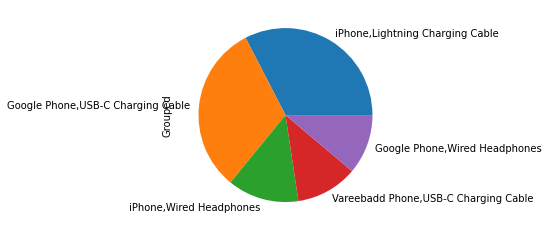

In [48]:
df2['Grouped'].value_counts()[0:5].plot.pie()

In [49]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [50]:
values=df2['Grouped'].value_counts()[0:5]
labels=df['Grouped'].value_counts()[0:5].index

In [51]:
trace=go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=25),
              pull=[0, 0, 0,0.2, 0]
               )

In [52]:
iplot([trace])